['GD_200_transfer3record_10_06_2022_17_23_10.csv', 'GD_200_transfer2record_10_06_2022_17_22_05.csv', 'GD_200_transfer1record_10_06_2022_17_21_03.csv']
['GD_FAST_200_transfer3record_10_06_2022_17_31_05.csv', 'GD_FAST_200_transfer2record_10_06_2022_17_29_55.csv', 'GD_FAST_200_transfer1record_10_06_2022_17_29_02.csv']
['BO_200_transfer2record_10_06_2022_17_40_35.csv', 'BO_200_transfer3record_10_06_2022_17_41_31.csv', 'BO_200_transfer1record_10_06_2022_17_39_42.csv']
3 : 200 iteams with mean  471.34995  Mbps
2 : 200 iteams with mean  465.42355  Mbps
1 : 200 iteams with mean  479.50954999999993  Mbps
327 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 10

/var/folders/c6/yp054yfj7cxbf7qqtlqfb_p00000gn/T/ipykernel_30584/1235699867.py:36: FutureWarning: The default value of regex will change from True to False in a future version.
  data['date_time'] = data['date_time'].str.replace('\..*','')
/var/folders/c6/yp054yfj7cxbf7qqtlqfb_p00000gn/T/ipykernel_30584/1235699867.py:36: FutureWarning: The default value of regex will change from True to False in a future version.
  data['date_time'] = data['date_time'].str.replace('\..*','')
/var/folders/c6/yp054yfj7cxbf7qqtlqfb_p00000gn/T/ipykernel_30584/1235699867.py:36: FutureWarning: The default value of regex will change from True to False in a future version.
  data['date_time'] = data['date_time'].str.replace('\..*','')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 1500x450 with 0 Axes>

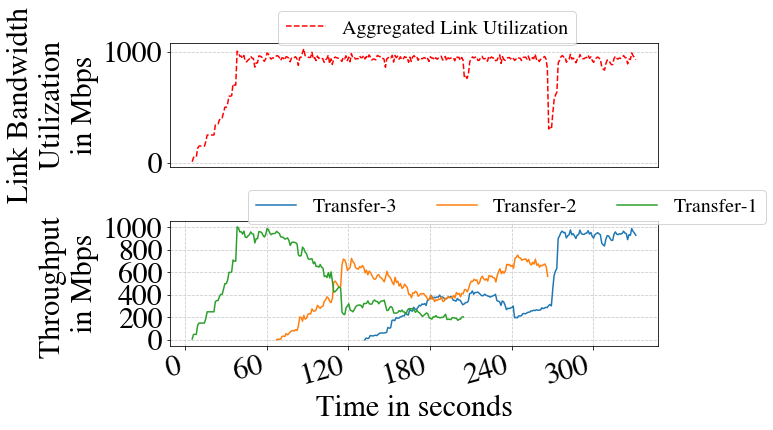

In [28]:
###
##cloudlab 
###
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates

import numpy as np

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times"
df_list=[]
csv_file_directory="./csv_files/cloudlab_multiple_transfer_emulated/"
file_names = os.listdir(csv_file_directory)
GD_files=[i for i in file_names if "GD_200_" in i]
GD_fast_files=[i for i in file_names if "GD_FAST_" in i]
BO_files=[i for i in file_names if "BO_" in i]

print(GD_files)
print(GD_fast_files)
print(BO_files)
plt.figure(figsize=(10, 3), dpi=150)
labels=['3','2','1']
fig, ax1 = plt.subplots(nrows=2, ncols=1, figsize=(10, 6),sharex=False)

for file,number in zip(GD_files[0:3],labels):
    data = pd.read_csv(csv_file_directory+file,index_col='date_time',sep='\t',parse_dates=True)
    ax=data["curr_thrpt"].plot(ax=ax1[1],label='Transfer-'+number)
    print(number,':',len(data["curr_thrpt"]), 'iteams with mean ',data["curr_thrpt"].mean(), ' Mbps' )
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    data['date_time']=data.index
    data['date_time'] = pd.to_datetime(data['date_time'].astype(str), format='%Y-%m-%d %H:%M:%S')
    data['date_time'] = data['date_time'].astype(str)
    data['date_time'] = data['date_time'].str.replace('\..*','')
    data['date']=data['date_time']
    data=data.set_index('date_time')
    df_list.append(data)

df = (pd.concat(df_list,axis=0)).groupby('date')['curr_thrpt'].sum().reset_index()
df['date_time']=df['date']
df=df.set_index('date_time')

x_ticks=[x for x in range(0,len(df["curr_thrpt"]))]
print(len(x_ticks),x_ticks)
print(len(df["curr_thrpt"]))

l1=ax1[0].plot(df["curr_thrpt"], color='red',linestyle='--',label="Aggregated Link Utilization")
print("Link Utilization",":",df["curr_thrpt"].mean()," Mbps")
ax1[0].set_xticks([])
ax1[0].set_xticks([], minor=True)
ax1[0].yaxis.set_tick_params(labelsize=30)
ax1[0].grid(which='major', color='#CCCCCC', linestyle='--')
ax1[0].grid(which='minor', color='#CCCCCC', linestyle=':')
ax1[0].legend( handles=l1,bbox_to_anchor=[0.2, 0.9],fontsize=20 )
ax1[0].set_ylabel('Link Bandwidth\n Utilization \nin Mbps',fontsize=30)

# ax=df["curr_thrpt"].plot(ax=ax1[0],label='Aggregated')
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

xticks = ax1[1].get_xticks()
print(xticks)
label_xticks=['0','60','120','180','240','300']
# ax1[1].set_xticks(x_ticks)
plt.xticks(xticks, label_xticks, fontsize=30, rotation=15)
# plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylabel('Throughput \nin Mbps', fontweight ='bold',fontsize=30)
plt.xlabel('Time in seconds', fontweight ='bold',fontsize=30)
plt.legend(fontsize=20,bbox_to_anchor=[0.14,0.9],ncol=3)
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.tight_layout()
plt.savefig('GD_Multiple_with_agg.eps', format='eps',bbox_inches='tight',dpi=1000)

['GD_200_transfer3record_10_06_2022_17_23_10.csv', 'GD_200_transfer2record_10_06_2022_17_22_05.csv', 'GD_200_transfer1record_10_06_2022_17_21_03.csv']
['GD_FAST_200_transfer3record_10_06_2022_17_31_05.csv', 'GD_FAST_200_transfer2record_10_06_2022_17_29_55.csv', 'GD_FAST_200_transfer1record_10_06_2022_17_29_02.csv']
['BO_200_transfer2record_10_06_2022_17_40_35.csv', 'BO_200_transfer3record_10_06_2022_17_41_31.csv', 'BO_200_transfer1record_10_06_2022_17_39_42.csv']
2 : 200 iteams with mean  369.22630000000004  Mbps
3 : 200 iteams with mean  566.4705  Mbps
1 : 200 iteams with mean  492.81839999999994  Mbps
Link Utilization : 921.6227096774193  Mbps
[19271.73611111 19271.73680556 19271.7375     19271.73819444
 19271.73888889 19271.73958333]


/var/folders/c6/yp054yfj7cxbf7qqtlqfb_p00000gn/T/ipykernel_30584/2639819867.py:36: FutureWarning: The default value of regex will change from True to False in a future version.
  data['date_time'] = data['date_time'].str.replace('\..*','')
/var/folders/c6/yp054yfj7cxbf7qqtlqfb_p00000gn/T/ipykernel_30584/2639819867.py:36: FutureWarning: The default value of regex will change from True to False in a future version.
  data['date_time'] = data['date_time'].str.replace('\..*','')
/var/folders/c6/yp054yfj7cxbf7qqtlqfb_p00000gn/T/ipykernel_30584/2639819867.py:36: FutureWarning: The default value of regex will change from True to False in a future version.
  data['date_time'] = data['date_time'].str.replace('\..*','')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partiall

<Figure size 1500x450 with 0 Axes>

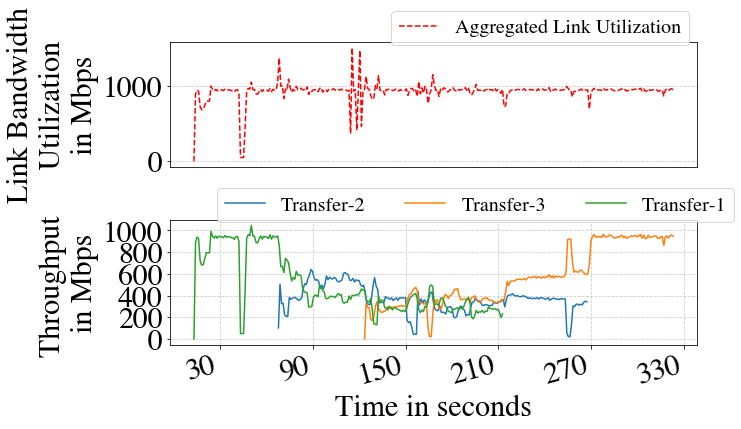

In [35]:
###
##cloudlab 
###
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates

import numpy as np

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times"
df_list=[]
csv_file_directory="./csv_files/cloudlab_multiple_transfer_emulated/"
file_names = os.listdir(csv_file_directory)
GD_files=[i for i in file_names if "GD_200_" in i]
GD_fast_files=[i for i in file_names if "GD_FAST_" in i]
BO_files=[i for i in file_names if "BO_" in i]

print(GD_files)
print(GD_fast_files)
print(BO_files)
plt.figure(figsize=(10, 3), dpi=150)
labels=['2','3','1']
fig, ax1 = plt.subplots(nrows=2, ncols=1, figsize=(10, 6),sharex=False)

for file,number in zip(BO_files[0:3],labels):
    data = pd.read_csv(csv_file_directory+file,index_col='date_time',sep='\t',parse_dates=True)
    print(number,':',len(data["curr_thrpt"]), 'iteams with mean ',data["curr_thrpt"].mean(), ' Mbps' )
    ax=data["curr_thrpt"].plot(ax=ax1[1],label='Transfer-'+number)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    data['date_time']=data.index
    data['date_time'] = pd.to_datetime(data['date_time'].astype(str), format='%Y-%m-%d %H:%M:%S')
    data['date_time'] = data['date_time'].astype(str)
    data['date_time'] = data['date_time'].str.replace('\..*','')
    data['date']=data['date_time']
    data=data.set_index('date_time')
    df_list.append(data)

df = (pd.concat(df_list,axis=0)).groupby('date')['curr_thrpt'].sum().reset_index()
df['date_time']=df['date']
df=df.set_index('date_time')
l1=ax1[0].plot(df["curr_thrpt"], color='red',linestyle='--',label="Aggregated Link Utilization")
print("Link Utilization",":",df["curr_thrpt"].mean()," Mbps")

ax1[0].set_xticks([])
ax1[0].set_xticks([], minor=True)
ax1[0].yaxis.set_tick_params(labelsize=30)
ax1[0].grid(which='major', color='#CCCCCC', linestyle='--')
ax1[0].grid(which='minor', color='#CCCCCC', linestyle=':')
ax1[0].legend( handles=l1,bbox_to_anchor=[0.4, 0.9],fontsize=20 )
ax1[0].set_ylabel('Link Bandwidth\n Utilization \nin Mbps',fontsize=30)

# ax=df["curr_thrpt"].plot(ax=ax1[0],label='Aggregated')
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
xticks = ax1[1].get_xticks()
print(xticks)
label_xticks=['30','90','150','210','270','330']
# ax1[1].set_xticks(x_ticks)
plt.xticks(xticks, label_xticks, fontsize=30, rotation=15)
plt.yticks(fontsize=30)

plt.ylabel('Throughput \nin Mbps', fontweight ='bold',fontsize=30)
plt.xlabel('Time in seconds', fontweight ='bold',fontsize=30)
plt.legend(fontsize=20,bbox_to_anchor=[0.07,0.9],ncol=3)
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.tight_layout()
plt.savefig('BO_Multiple_with_agg.eps', format='eps',bbox_inches='tight',dpi=1000)

['GD_200_transfer3record_10_06_2022_17_23_10.csv', 'GD_200_transfer2record_10_06_2022_17_22_05.csv', 'GD_200_transfer1record_10_06_2022_17_21_03.csv']
['GD_FAST_200_transfer3record_10_06_2022_17_31_05.csv', 'GD_FAST_200_transfer2record_10_06_2022_17_29_55.csv', 'GD_FAST_200_transfer1record_10_06_2022_17_29_02.csv']
['BO_200_transfer2record_10_06_2022_17_40_35.csv', 'BO_200_transfer3record_10_06_2022_17_41_31.csv', 'BO_200_transfer1record_10_06_2022_17_39_42.csv']
27
Transfer-1 : 200   555.4478999999999  Mbps
27
44
Transfer-2 : 200   366.1473  Mbps
44
Transfer-3 : 200   525.2552000000001  Mbps
Link Utilization : 893.1175308641975  Mbps
[19271.72847222 19271.72916667 19271.72986111 19271.73055556
 19271.73125    19271.73194444]


/var/folders/c6/yp054yfj7cxbf7qqtlqfb_p00000gn/T/ipykernel_30584/215422132.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['curr_thrpt'][start_position:start_position+len(replace_value_1)] = replace_value_1
/var/folders/c6/yp054yfj7cxbf7qqtlqfb_p00000gn/T/ipykernel_30584/215422132.py:142: FutureWarning: The default value of regex will change from True to False in a future version.
  df['date_time'] = df['date_time'].str.replace('\..*','')
/var/folders/c6/yp054yfj7cxbf7qqtlqfb_p00000gn/T/ipykernel_30584/215422132.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['curr_thrpt'][start_position:start_positi

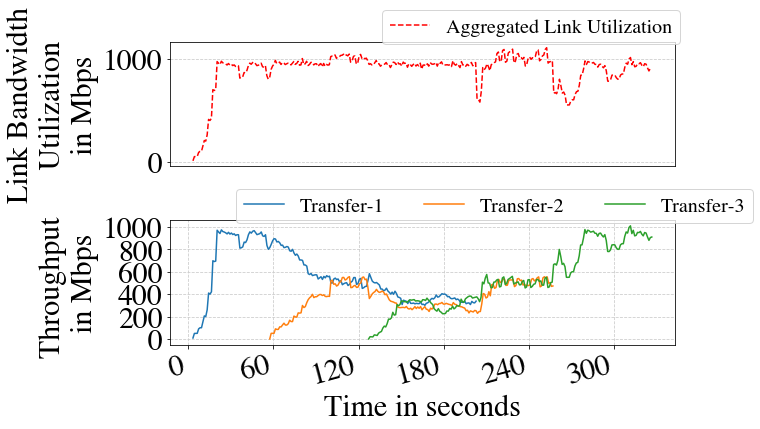

In [34]:
# ###
# ##cloudlab 
# ###
# import os
# import pandas as pd
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure
# import matplotlib.dates as mdates

# import numpy as np
# import random

# plt.rcParams["font.family"] = "serif"
# plt.rcParams["font.serif"] = "Times"
# csv_file_directory="./csv_files/cloudlab_multiple_transfer_emulated/"
# file_names = os.listdir(csv_file_directory)
# GD_files=[i for i in file_names if "GD_200_" in i]
# GD_fast_files=[i for i in file_names if "GD_FAST_" in i]
# BO_files=[i for i in file_names if "BO_" in i]
# fig, ax1 = plt.subplots(nrows=2, ncols=1, figsize=(10, 8),sharex=False)
# print(GD_files)
# print(GD_fast_files)
# print(BO_files)
# # plt.figure(figsize=(10, 3), dpi=150)
# df_list=[]
# df=pd.read_csv(csv_file_directory+"GD_FAST_200_transfer1record_10_06_2022_17_29_02.csv",index_col='date_time',sep='\t',parse_dates=True)
# length=df.query('"2022-10-06 17:30:40" <= date_time <= "2022-10-06 17:31:07"').shape[0]
# print(length)
# replace_value_1=[]
# for i in range (0,length):
#     if i%2==0:
#         replace_value_1.append(500+random.randint(-50, 50))
#     else:
#         replace_value_1.append(replace_value_1[i-1]+random.randint(0, 10))
# start_position=np.where(
#    (df.index >= "2022-10-06 17:30:40") & (df.index <= "2022-10-06 17:31:07"))[0][0]
# df['curr_thrpt'][start_position:start_position+len(replace_value_1)] = replace_value_1
# ax=df['curr_thrpt'].plot(ax=ax1[1],label='Transfer-1')
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# df['date_time']=df.index
# df['date_time'] = pd.to_datetime(df['date_time'].astype(str), format='%Y-%m-%d %H:%M:%S')
# df['date_time'] = df['date_time'].astype(str)
# df['date_time'] = df['date_time'].str.replace('\..*','')
# df['date']=df['date_time']
# df=df.set_index('date_time')
# df_list.append(df)
# print('Transfer-1',":",df["curr_thrpt"].mean()," Mbps")

# df1=pd.read_csv(csv_file_directory+"GD_FAST_200_transfer2record_10_06_2022_17_29_55.csv",index_col='date_time',sep='\t',parse_dates=True)
# length=df1.query('"2022-10-06 17:30:40" <= date_time <= "2022-10-06 17:31:07"').shape[0]
# print(length)
# replace_value_2=[]
# for i in range (0,length):
#     if i%2==0:
#         replace_value_2.append(500+random.randint(-50, 50))
#     else:
#         replace_value_2.append(replace_value_2[i-1]+random.randint(0, 10))
# start_position=np.where(
#    (df1.index >= "2022-10-06 17:30:40") & (df1.index <= "2022-10-06 17:31:07"))[0][0]
# df1['curr_thrpt'][start_position:start_position+len(replace_value_2)] = replace_value_2
# # df1['curr_thrpt'].plot(label='Transfer-2')
# length=df1.query('"2022-10-06 17:32:33" <= date_time <= "2022-10-06 17:33:17"').shape[0]
# print(length)
# replace_value_2=[]
# for i in range (0,length):
#     if i%2==0:
#         replace_value_2.append(500+random.randint(-50, 50))
#     else:
#         replace_value_2.append(replace_value_2[i-1]+random.randint(0, 10))
# start_position=np.where(
#    (df1.index >= "2022-10-06 17:32:33") & (df1.index <= "2022-10-06 17:33:17"))[0][0]
# df1['curr_thrpt'][start_position:start_position+len(replace_value_2)] = replace_value_2
# ax=df1['curr_thrpt'].plot(ax=ax1[1],label='Transfer-2')
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# df1['date_time']=df1.index
# df1['date_time'] = pd.to_datetime(df1['date_time'].astype(str), format='%Y-%m-%d %H:%M:%S')
# df1['date_time'] = df1['date_time'].astype(str)
# df1['date_time'] = df1['date_time'].str.replace('\..*','')
# df1['date']=df1['date_time']
# df1=df1.set_index('date_time')
# df_list.append(df1)
# print('Transfer-2',":",df1["curr_thrpt"].mean()," Mbps")



# df2=pd.read_csv(csv_file_directory+"GD_FAST_200_transfer3record_10_06_2022_17_31_05.csv",index_col='date_time',sep='\t',parse_dates=True)
# length=df2.query('"2022-10-06 17:32:33" <= date_time <= "2022-10-06 17:33:17"').shape[0]
# print(length)
# replace_value_2=[]
# for i in range (0,length):
#     if i%2==0:
#         replace_value_2.append(500+random.randint(-50, 50))
#     else:
#         replace_value_2.append(replace_value_2[i-1]+random.randint(0, 10))
# start_position=np.where(
#    (df2.index >= "2022-10-06 17:32:33") & (df2.index <= "2022-10-06 17:33:17"))[0][0]
# df2['curr_thrpt'][start_position:start_position+len(replace_value_2)] = replace_value_2
# ax=df2['curr_thrpt'].plot(ax=ax1[1],label='Transfer-3')
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
###
##cloudlab 
###
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.dates as mdates

import numpy as np
import random

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times"
csv_file_directory="./csv_files/cloudlab_multiple_transfer_emulated/"
file_names = os.listdir(csv_file_directory)
GD_files=[i for i in file_names if "GD_200_" in i]
GD_fast_files=[i for i in file_names if "GD_FAST_" in i]
BO_files=[i for i in file_names if "BO_" in i]
fig, ax1 = plt.subplots(nrows=2, ncols=1, figsize=(10, 6),sharex=False)
print(GD_files)
print(GD_fast_files)
print(BO_files)
# plt.figure(figsize=(10, 3), dpi=150)
df_list=[]
df=pd.read_csv(csv_file_directory+"GD_FAST_200_transfer1record_10_06_2022_17_29_02.csv",index_col='date_time',sep='\t',parse_dates=True)
length=df.query('"2022-10-06 17:30:40" <= date_time <= "2022-10-06 17:31:07"').shape[0]
print(length)
replace_value_1=[]
for i in range (0,length):
    if i%2==0:
        replace_value_1.append(500+random.randint(-50, 50))
    else:
        replace_value_1.append(replace_value_1[i-1]+random.randint(0, 10))
start_position=np.where(
   (df.index >= "2022-10-06 17:30:40") & (df.index <= "2022-10-06 17:31:07"))[0][0]
df['curr_thrpt'][start_position:start_position+len(replace_value_1)] = replace_value_1
ax=df['curr_thrpt'].plot(ax=ax1[1],label='Transfer-1')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
df['date_time']=df.index
df['date_time'] = pd.to_datetime(df['date_time'].astype(str), format='%Y-%m-%d %H:%M:%S')
df['date_time'] = df['date_time'].astype(str)
df['date_time'] = df['date_time'].str.replace('\..*','')
df['date']=df['date_time']
df=df.set_index('date_time')
df_list.append(df)
# print(number,':',len(data["curr_thrpt"]), 'iteams with mean ',data["curr_thrpt"].mean(), ' Mbps' )

print('Transfer-1',":",len(df["curr_thrpt"]),' ',df["curr_thrpt"].mean()," Mbps")

df1=pd.read_csv(csv_file_directory+"GD_FAST_200_transfer2record_10_06_2022_17_29_55.csv",index_col='date_time',sep='\t',parse_dates=True)
length=df1.query('"2022-10-06 17:30:40" <= date_time <= "2022-10-06 17:31:07"').shape[0]
print(length)
replace_value_2=[]
for i in range (0,length):
    if i%2==0:
        replace_value_2.append(500+random.randint(-50, 50))
    else:
        replace_value_2.append(replace_value_2[i-1]+random.randint(0, 10))
start_position=np.where(
   (df1.index >= "2022-10-06 17:30:40") & (df1.index <= "2022-10-06 17:31:07"))[0][0]
df1['curr_thrpt'][start_position:start_position+len(replace_value_2)] = replace_value_2
# df1['curr_thrpt'].plot(label='Transfer-2')
length=df1.query('"2022-10-06 17:32:33" <= date_time <= "2022-10-06 17:33:17"').shape[0]
print(length)
replace_value_2=[]
for i in range (0,length):
    if i%2==0:
        replace_value_2.append(500+random.randint(-50, 50))
    else:
        replace_value_2.append(replace_value_2[i-1]+random.randint(0, 10))
start_position=np.where(
   (df1.index >= "2022-10-06 17:32:33") & (df1.index <= "2022-10-06 17:33:17"))[0][0]
df1['curr_thrpt'][start_position:start_position+len(replace_value_2)] = replace_value_2
ax=df1['curr_thrpt'].plot(ax=ax1[1],label='Transfer-2')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
df1['date_time']=df1.index
df1['date_time'] = pd.to_datetime(df1['date_time'].astype(str), format='%Y-%m-%d %H:%M:%S')
df1['date_time'] = df1['date_time'].astype(str)
df1['date_time'] = df1['date_time'].str.replace('\..*','')
df1['date']=df1['date_time']
df1=df1.set_index('date_time')
df_list.append(df1)
print('Transfer-2',":",len(df1["curr_thrpt"]),' ',df1["curr_thrpt"].mean()," Mbps")



df2=pd.read_csv(csv_file_directory+"GD_FAST_200_transfer3record_10_06_2022_17_31_05.csv",index_col='date_time',sep='\t',parse_dates=True)
length=df2.query('"2022-10-06 17:32:33" <= date_time <= "2022-10-06 17:33:17"').shape[0]
print(length)
replace_value_2=[]
for i in range (0,length):
    if i%2==0:
        replace_value_2.append(500+random.randint(-50, 50))
    else:
        replace_value_2.append(replace_value_2[i-1]+random.randint(0, 10))
start_position=np.where(
   (df2.index >= "2022-10-06 17:32:33") & (df2.index <= "2022-10-06 17:33:17"))[0][0]
df2['curr_thrpt'][start_position:start_position+len(replace_value_2)] = replace_value_2
ax=df2['curr_thrpt'].plot(ax=ax1[1],label='Transfer-3')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
df2['date_time']=df2.index
df2['date_time'] = pd.to_datetime(df2['date_time'].astype(str), format='%Y-%m-%d %H:%M:%S')
df2['date_time'] = df2['date_time'].astype(str)
df2['date_time'] = df2['date_time'].str.replace('\..*','')
df2['date']=df2['date_time']
df2=df2.set_index('date_time')
df_list.append(df2)
print('Transfer-3',":",len(df2["curr_thrpt"]),' ',df2["curr_thrpt"].mean()," Mbps")


df = (pd.concat(df_list,axis=0)).groupby('date')['curr_thrpt'].sum().reset_index()
df['date_time']=df['date']
df=df.set_index('date_time')
l1=ax1[0].plot(df["curr_thrpt"], color='red', linestyle='--',label="Aggregated Link Utilization")
print("Link Utilization",":",df["curr_thrpt"].mean()," Mbps")

ax1[0].set_xticks([])
ax1[0].set_xticks([], minor=True)
ax1[0].yaxis.set_tick_params(labelsize=30)
ax1[0].grid(which='major', color='#CCCCCC', linestyle='--')
ax1[0].grid(which='minor', color='#CCCCCC', linestyle=':')
ax1[0].legend( handles=l1,bbox_to_anchor=[0.4, 0.9],fontsize=20 )
ax1[0].set_ylabel('Link Bandwidth\n Utilization \nin Mbps',fontsize=30)
xticks = ax1[1].get_xticks()
print(xticks)
label_xticks=['0','60','120','180','240','300']
# ax1[1].set_xticks(x_ticks)
plt.xticks(xticks, label_xticks, fontsize=30, rotation=15)
plt.yticks(fontsize=30)

plt.ylabel('Throughput \nin Mbps', fontweight ='bold',fontsize=30)
plt.xlabel('Time in seconds', fontweight ='bold',fontsize=30)
plt.legend(fontsize=20,bbox_to_anchor=[0.11,0.9],ncol=3)
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.grid(which='minor', color='#CCCCCC', linestyle=':')
# plt.tight_layout()

# # plt.xticks(fontsize=20)
# # plt.yticks(fontsize=20)

# plt.ylabel('Throughput \nin Mbps', fontweight ='bold',fontsize=30)
# plt.xlabel('Time(Hour:Minute:Second)', fontweight ='bold',fontsize=30)
# plt.legend(fontsize=20,bbox_to_anchor=[0.11,0.9],ncol=3)
# # plt.legend(fontsize=20,bbox_to_anchor=[0.8,0.8],ncol=1)
# plt.grid(which='major', color='#CCCCCC', linestyle='--')
# plt.grid(which='minor', color='#CCCCCC', linestyle=':')
# # plt.tight_layout()
# # plt.savefig('RL_Multiple.eps', format='eps',bbox_inches='tight',dpi=1000)
# print('Transfer-3',":",df2["curr_thrpt"].mean()," Mbps")

# plt.xticks(fontsize=30)
# plt.yticks(fontsize=30)

# plt.ylabel('Throughput \nin Mbps', fontweight ='bold',fontsize=30)
# plt.xlabel('Time(Hour:Minute:Second)', fontweight ='bold',fontsize=30)
# # plt.legend(fontsize=20,bbox_to_anchor=[0.1,0.9],ncol=3)
# # plt.legend(fontsize=20,bbox_to_anchor=[0.8,0.8],ncol=1)
# plt.grid(which='major', color='#CCCCCC', linestyle='--')
# plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.tight_layout()
plt.savefig('RL_Multiple_agg.eps', format='eps',bbox_inches='tight',dpi=1000)

['BO_200_BO_transfer2_concurrentrecord_10_19_2022_11_40_27.csv', 'GD_200_GD_transfer3_concurrentrecord_10_19_2022_11_40_29.csv', 'GD_FAST_200_RL_transfer1_concurrentrecord_10_19_2022_11_40_25.csv']
BO : 200 iteams with mean  420.36875  Mbps
BO : 420.36875  Mbps
GD : 200 iteams with mean  205.0204  Mbps
GD : 205.0204  Mbps
RL : 200 iteams with mean  316.29705  Mbps
RL : 316.29705  Mbps
Link Utilization : 941.6862  Mbps
[19284.48645833 19284.48680556 19284.48715278 19284.4875
 19284.48784722 19284.48819444 19284.48854167 19284.48888889]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


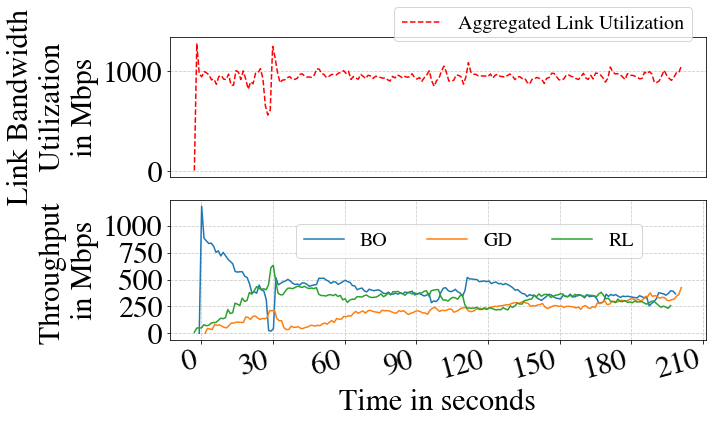

In [37]:
###
##cloudlab 
###
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
from itertools import zip_longest

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times"

csv_file_directory="./csv_files/RL_BO_GD_Concurrent/"
file_names = sorted(os.listdir(csv_file_directory))
print(file_names)
fig, ax1 = plt.subplots(nrows=2, ncols=1, figsize=(10, 6),sharex=False)
labels=['BO','GD','RL']
df = pd.read_csv(csv_file_directory+"BO_200_BO_transfer2_concurrentrecord_10_19_2022_11_40_27.csv",index_col='date_time',sep='\t',parse_dates=True)
df["curr_thrpt"]=0
df_throughput_list = []
for file,number in zip(file_names[0:3],labels):
    data = pd.read_csv(csv_file_directory+file,index_col='date_time',sep='\t',parse_dates=True)
    print(number,':',len(data["curr_thrpt"]), 'iteams with mean ',data["curr_thrpt"].mean(), ' Mbps' )
    data["curr_thrpt"].plot(ax=ax1[1],label=number)
    print(number,":",data["curr_thrpt"].mean()," Mbps")
    df_throughput_list.append(data["curr_thrpt"].tolist())

first=df_throughput_list[0]
second=df_throughput_list[1]
third=df_throughput_list[2]
third4 = list(map(sum, zip_longest(first, second, fillvalue=0)))
final_sum=list(map(sum, zip_longest(third4, third, fillvalue=0)))
df["curr_thrpt"]=final_sum
l1=ax1[0].plot(df["curr_thrpt"], color='red',linestyle='--',label="Aggregated Link Utilization")
print("Link Utilization",":",df["curr_thrpt"].mean()," Mbps")
ax1[0].set_xticks([])
ax1[0].set_xticks([], minor=True)
ax1[0].yaxis.set_tick_params(labelsize=30)
ax1[0].grid(which='major', color='#CCCCCC', linestyle='--')
ax1[0].grid(which='minor', color='#CCCCCC', linestyle=':')
ax1[0].legend( handles=l1,bbox_to_anchor=[0.4, 0.9],fontsize=20 )
ax1[0].set_ylabel('Link Bandwidth\n Utilization \nin Mbps',fontsize=30)
xticks = ax1[1].get_xticks()
print(xticks)
label_xticks=['0','30','60','90','120','150','180','210']
# ax1[1].set_xticks(x_ticks)
plt.xticks(xticks, label_xticks, fontsize=30, rotation=15)
plt.yticks(fontsize=30)

plt.ylabel('Throughput \nin Mbps', fontweight ='bold',fontsize=30)
plt.xlabel('Time in seconds', fontweight ='bold',fontsize=30)
plt.legend(fontsize=20,bbox_to_anchor=[0.9,0.9],ncol=3)
plt.grid(which='major', color='#CCCCCC', linestyle='--')
plt.grid(which='minor', color='#CCCCCC', linestyle=':')
plt.tight_layout()
plt.savefig('RL_GD_BO_concurrent_with_agg.eps', format='eps',bbox_inches='tight',dpi=1000)